In [1]:
#Data Loading
from keras.datasets import cifar10 
(train_images, train_labels), (test_images, test_labels)  = cifar10.load_data()
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [2]:
#Rshape the data for Dense layers then Scaling it.
train_images = train_images.reshape((50000, 32 *3* 32))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 *3* 32))
test_images = test_images.astype('float32') / 255

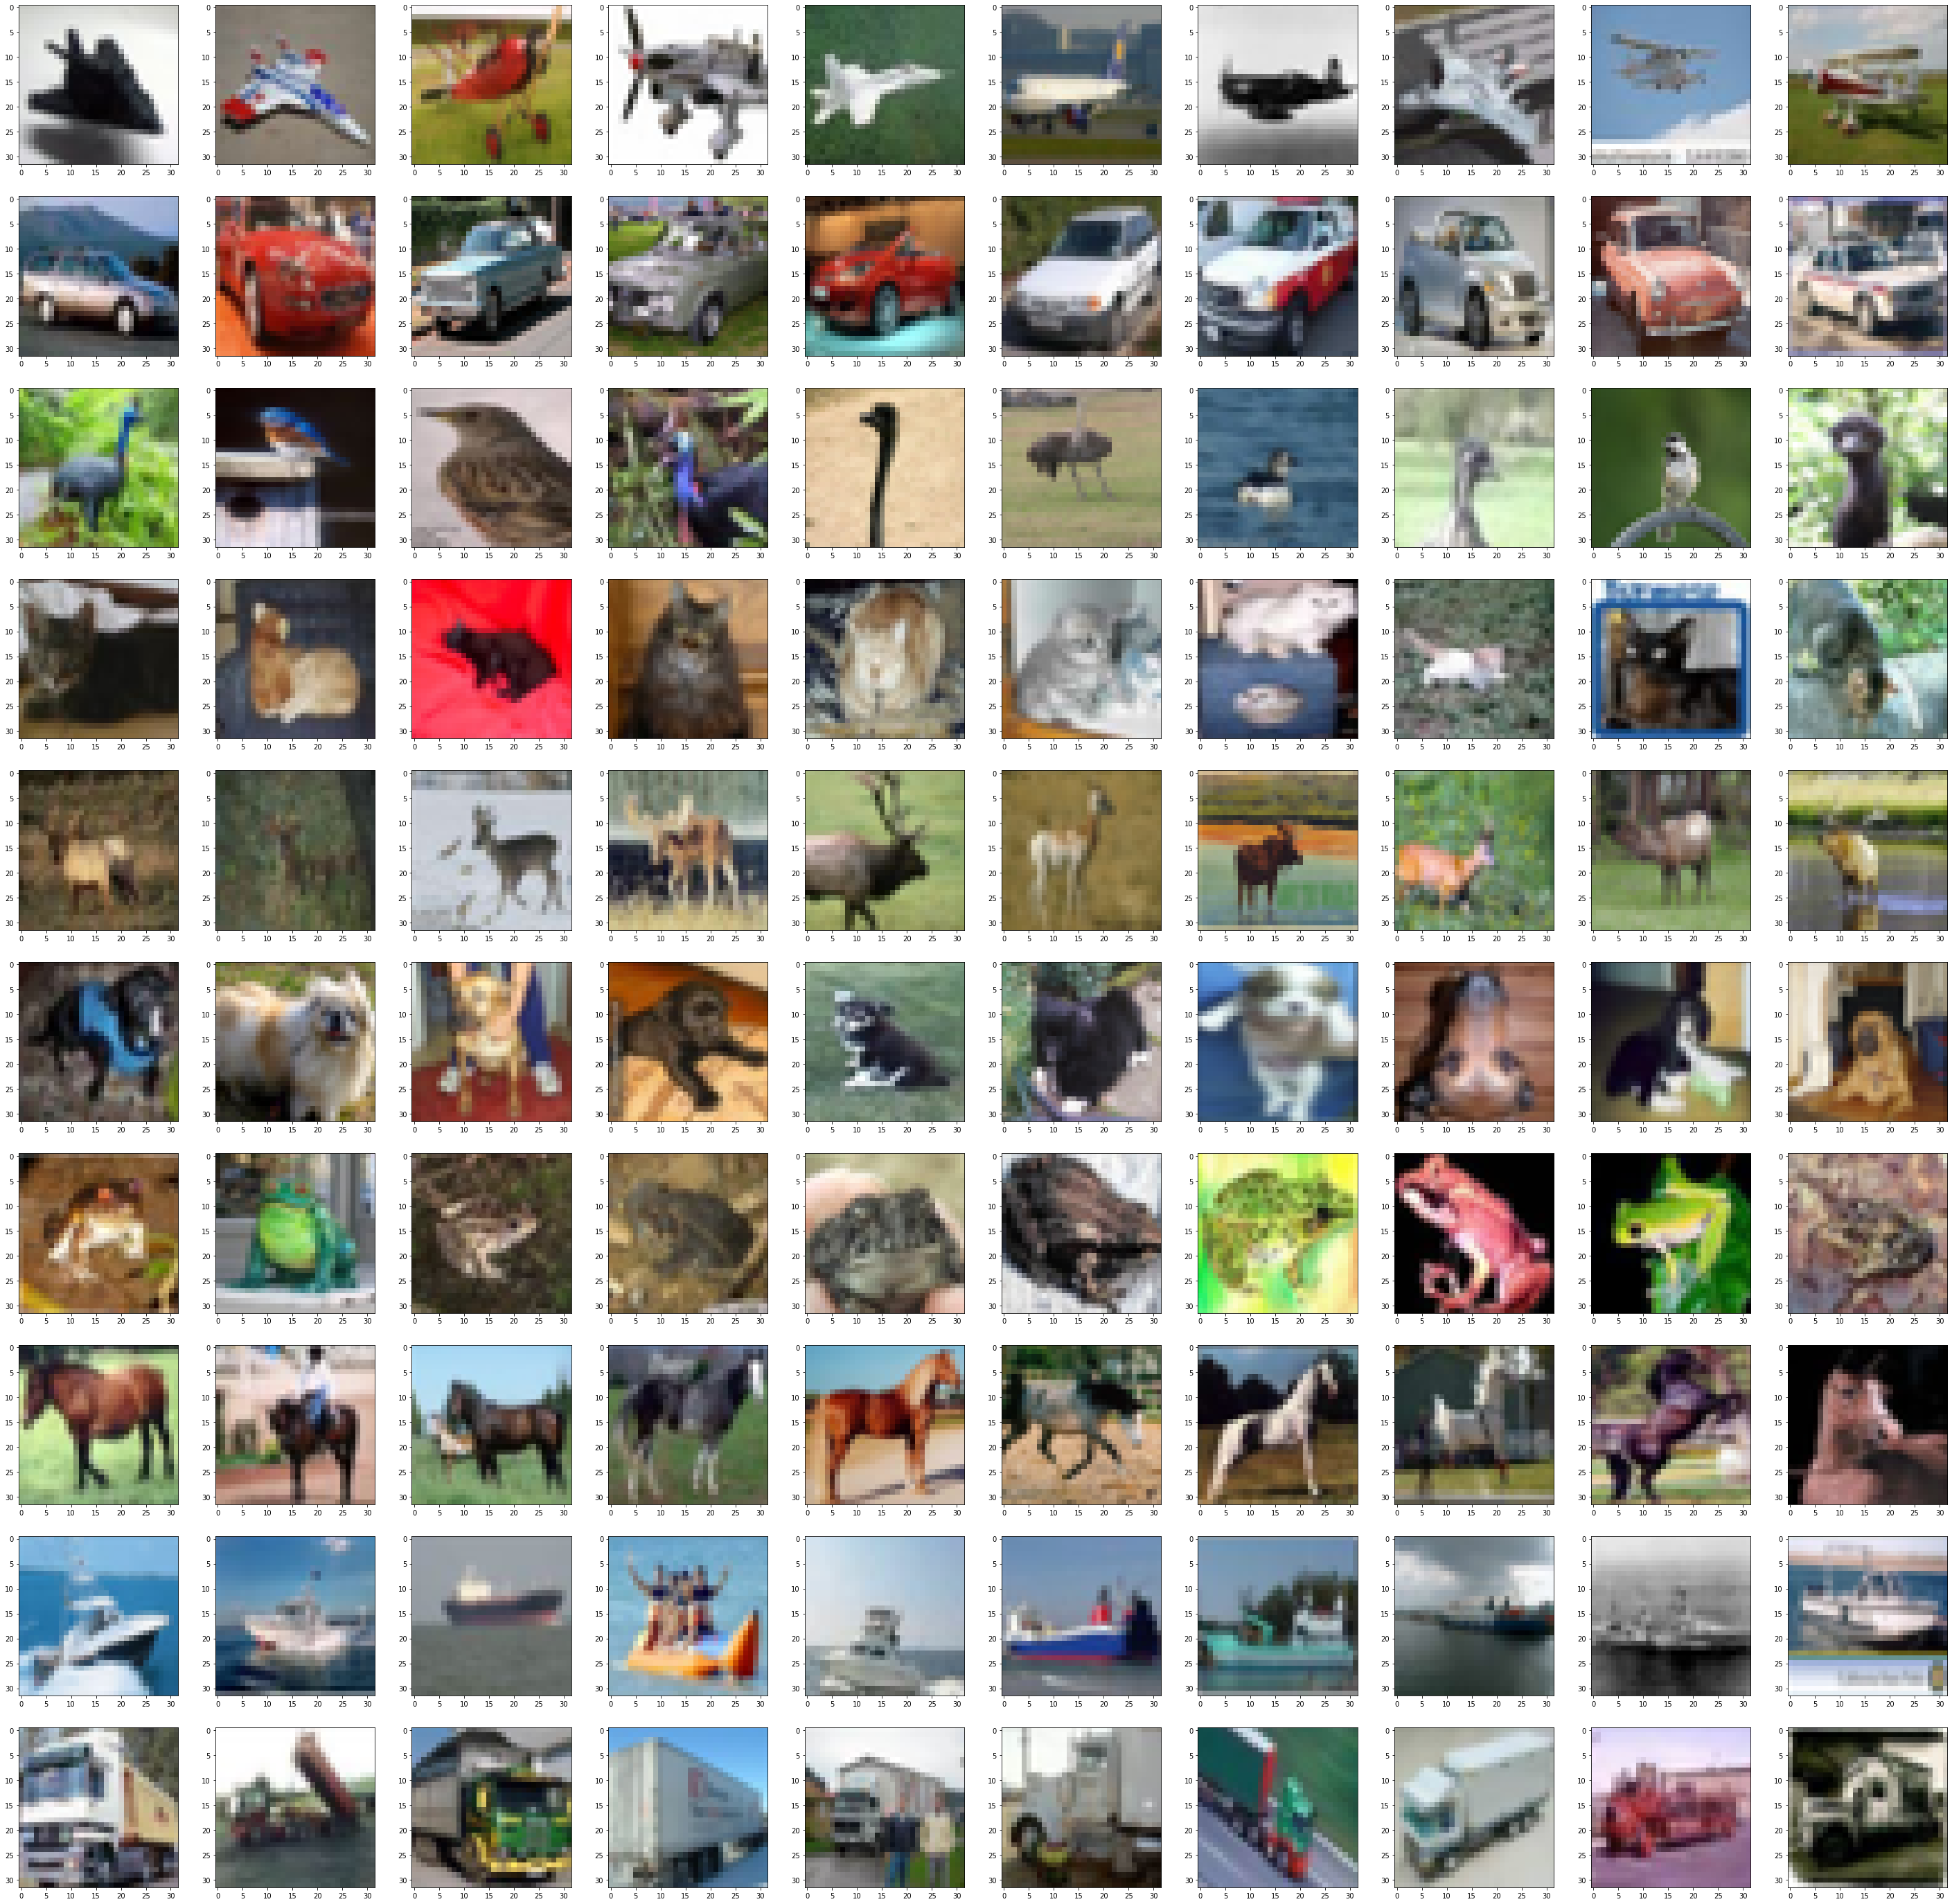

In [ ]:
#Visualize 10 examples from each class, in a grid of 10x10 plots
import numpy as np
import matplotlib.pyplot as plt

classes=[]
for i in range(10):
  classes.append(np.where(train_labels == i)[0][:10])

fig = plt.figure(figsize=(50, 50))
index = 1
for i in classes:
  for j in i:
    fig.add_subplot(10, 10, index)
    img = train_images[j]
    plt.imshow(np.reshape(img, (32, 32, 3)))
    index+=1

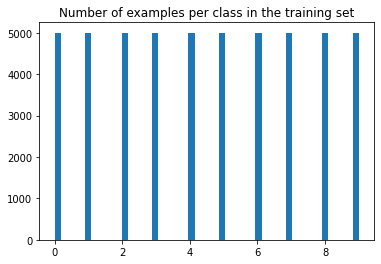

In [ ]:
#Plot a histogram of number of examples per class in the training 
plt.hist(train_labels,bins=50)
plt.title('Number of examples per class in the training set');

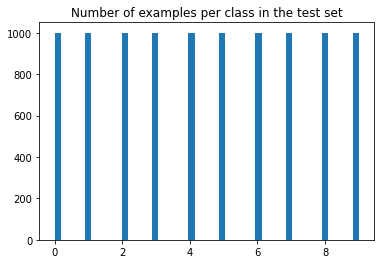

In [ ]:
#Plot a histogram of number of examples per class in the test sets
plt.hist(test_labels,bins=50)
plt.title('Number of examples per class in the test set');

512-256-128
Use adam optimizer with learning rate=10e-3

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 *3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


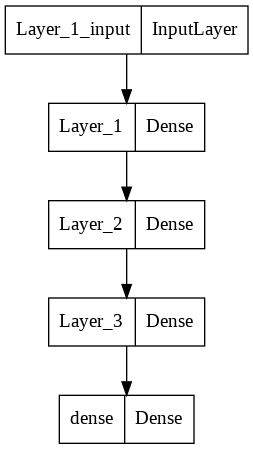

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(network)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape, test_labels.shape

((50000, 10), (10000, 10))

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

network.compile(optimizer=optimizers.Adam(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = network.fit(train_images,
          train_labels,
          epochs=20,
          batch_size=128,
          validation_data=(test_images, test_labels))

Epoch 1/20
391/391 [==============================] - 13s 31ms/step - loss: 1.8749 - accuracy: 0.3246 - val_loss: 1.7331 - val_accuracy: 0.3836
Epoch 2/20
391/391 [==============================] - 12s 30ms/step - loss: 1.6743 - accuracy: 0.4000 - val_loss: 1.6115 - val_accuracy: 0.4260
Epoch 3/20
391/391 [==============================] - 13s 33ms/step - loss: 1.5864 - accuracy: 0.4297 - val_loss: 1.5912 - val_accuracy: 0.4371
Epoch 4/20
391/391 [==============================] - 12s 31ms/step - loss: 1.5332 - accuracy: 0.4522 - val_loss: 1.5385 - val_accuracy: 0.4474
Epoch 5/20
391/391 [==============================] - 12s 30ms/step - loss: 1.4888 - accuracy: 0.4667 - val_loss: 1.4856 - val_accuracy: 0.4705
Epoch 6/20
391/391 [==============================] - 13s 33ms/step - loss: 1.4519 - accuracy: 0.4827 - val_loss: 1.4638 - val_accuracy: 0.4833
Epoch 7/20
391/391 [==============================] - 12s 30ms/step - loss: 1.4180 - accuracy: 0.4947 - val_loss: 1.4503 - val_accuracy:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

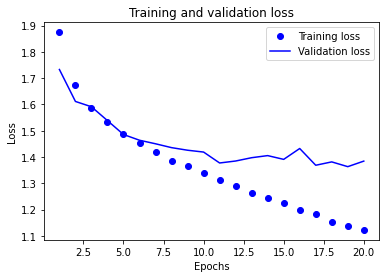

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

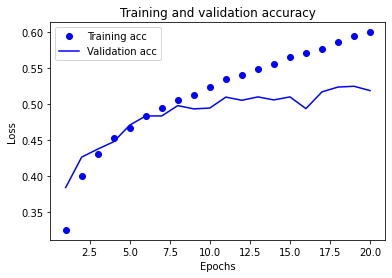

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()